# Pandas Group By

**In this tutorial we are going to look at weather data from various cities and see how group by can used to run some analytics.**

In [2]:
import pandas as pd
df = pd.read_excel("A:\\Pandas File\\weather by cities.xlsx")
df

,day,city,temperature,windspeed,event
0,2023-01-01,new york,32,6,Rain
1,2023-01-02,new york,36,7,Sunny
2,2023-01-03,new york,28,12,Snow
3,2023-01-04,new york,33,7,Sunny
4,2023-01-01,mumbai,90,5,Sunny
5,2023-01-02,mumbai,85,12,Fog
6,2023-01-03,mumbai,87,15,Fog
7,2023-01-04,mumbai,92,5,Rain
8,2023-01-01,paris,45,20,Sunny
9,2023-01-02,paris,50,13,Cloudy


## For this dataset, get following answers,
**1. What was the maximum temperature in each of these 3 cities?**

**2. What was the average windspeed in each of these 3 cities?**

In [4]:
g = df.groupby("city")
g

**DataFrame GroupBy object looks something like below**

In [5]:
for city, data in g:
    print("city:", city)
    print("\n")
    print("data:",data)

city: mumbai


data:          day    city  temperature  windspeed  event
4 2023-01-01  mumbai           90          5  Sunny
5 2023-01-02  mumbai           85         12    Fog
6 2023-01-03  mumbai           87         15    Fog
7 2023-01-04  mumbai           92          5   Rain
city: new york


data:          day      city  temperature  windspeed  event
0 2023-01-01  new york           32          6   Rain
1 2023-01-02  new york           36          7  Sunny
2 2023-01-03  new york           28         12   Snow
3 2023-01-04  new york           33          7  Sunny
city: paris


data:           day   city  temperature  windspeed   event
8  2023-01-01  paris           45         20   Sunny
9  2023-01-02  paris           50         13  Cloudy
10 2023-01-03  paris           54          8  Cloudy
11 2023-01-04  paris           42         10  Cloudy


**This is similar to SQL,**

**select *from weather_data GroupBy city**

In [6]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,2023-01-01,mumbai,90,5,Sunny
5,2023-01-02,mumbai,85,12,Fog
6,2023-01-03,mumbai,87,15,Fog
7,2023-01-04,mumbai,92,5,Rain


In [7]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,2023-01-04,92,15,Sunny
new york,2023-01-04,36,12,Sunny
paris,2023-01-04,54,20,Sunny


In [8]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


**This method of splitting your dataset in smaller groups and then applying an operation (such as min or max) to get aggregate result is called Split-Apply_Combine. It is illustrated in a diagram below**

In [10]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,2023-01-01,85,5,Fog
new york,2023-01-01,28,6,Rain
paris,2023-01-01,42,8,Cloudy


In [11]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [12]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [13]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      AxesSubplot(0.125,0.11;0.775x0.77)
new york    AxesSubplot(0.125,0.11;0.775x0.77)
paris       AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

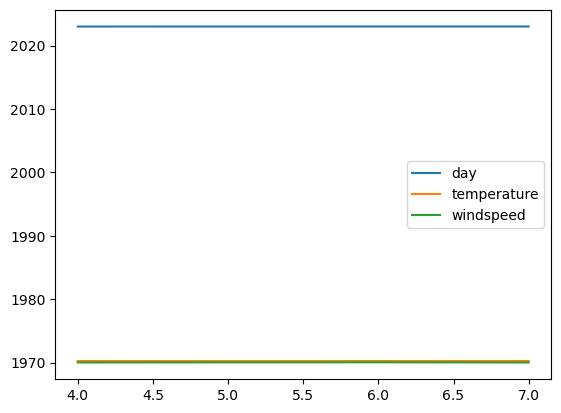

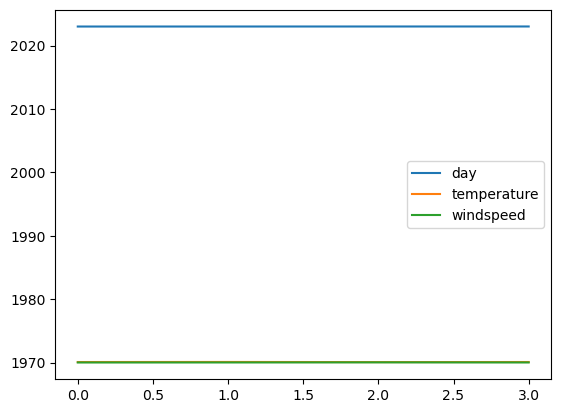

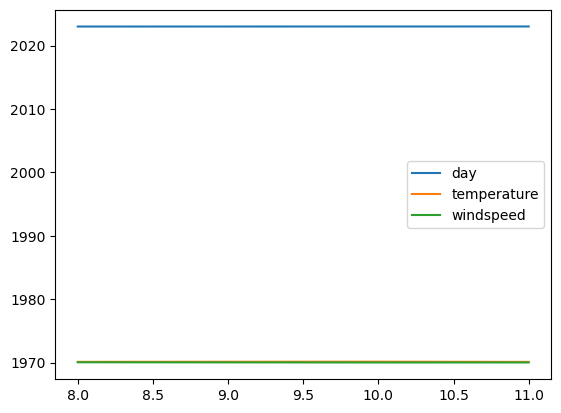

In [15]:
%matplotlib inline
g.plot()

**Group data using custom function: Let's say you want to group your data using custom function.
  Here the requirement is to create three groups**

**1. Days when temperature was between 80 and 90**

**2. Days when it was between 50 and 60**

**3. Days when it was anything else**

*For this you need to write custom grouping function and pass that to groupby*

In [16]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [17]:
g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

In [18]:
for key, d in g:
    print("Group by key: {}\n".format(key))
    print(d)

Group by key: 50-60

          day   city  temperature  windspeed   event
9  2023-01-02  paris           50         13  Cloudy
10 2023-01-03  paris           54          8  Cloudy
Group by key: 80-90

         day    city  temperature  windspeed  event
4 2023-01-01  mumbai           90          5  Sunny
5 2023-01-02  mumbai           85         12    Fog
6 2023-01-03  mumbai           87         15    Fog
Group by key: others

          day      city  temperature  windspeed   event
0  2023-01-01  new york           32          6    Rain
1  2023-01-02  new york           36          7   Sunny
2  2023-01-03  new york           28         12    Snow
3  2023-01-04  new york           33          7   Sunny
7  2023-01-04    mumbai           92          5    Rain
8  2023-01-01     paris           45         20   Sunny
11 2023-01-04     paris           42         10  Cloudy
